<a href="https://colab.research.google.com/github/u-khan902/codsoftProjects/blob/main/Codesoft_Task1_MOVIE_GENRE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Imprt All libraries **



In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# **### Importing the data**

In [23]:
train_data = pd.read_csv("/content/train_data.txt", sep=':::', names=['Id','Title', 'Gener','Description' ])
display(train_data.head())
print(train_data.shape)

<ipython-input-23-6a64691d7188>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("/content/train_data.txt", sep=':::', names=['Id','Title', 'Gener','Description' ])


,Id,Title,Gener,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(54214, 4)


In [24]:
test_data = pd.read_csv("/content/test_data.txt", sep=':::', names=['Id','Title', 'Gener','Description' ])
display(test_data.head())
print(test_data.shape)

<ipython-input-24-76558791b30d>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("/content/test_data.txt", sep=':::', names=['Id','Title', 'Gener','Description' ])


,Id,Title,Gener,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


(54200, 4)


In [25]:
test_data_solution = pd.read_csv('/content/test_data_solution.txt', sep=':::', names=['Id', 'Title', 'Gener', 'Description'])
display(test_data_solution.head())
print(test_data_solution.shape)

<ipython-input-25-856d277738c2>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data_solution = pd.read_csv('/content/test_data_solution.txt', sep=':::', names=['Id', 'Title', 'Gener', 'Description'])


,Id,Title,Gener,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


(54200, 4)


# Data visualization

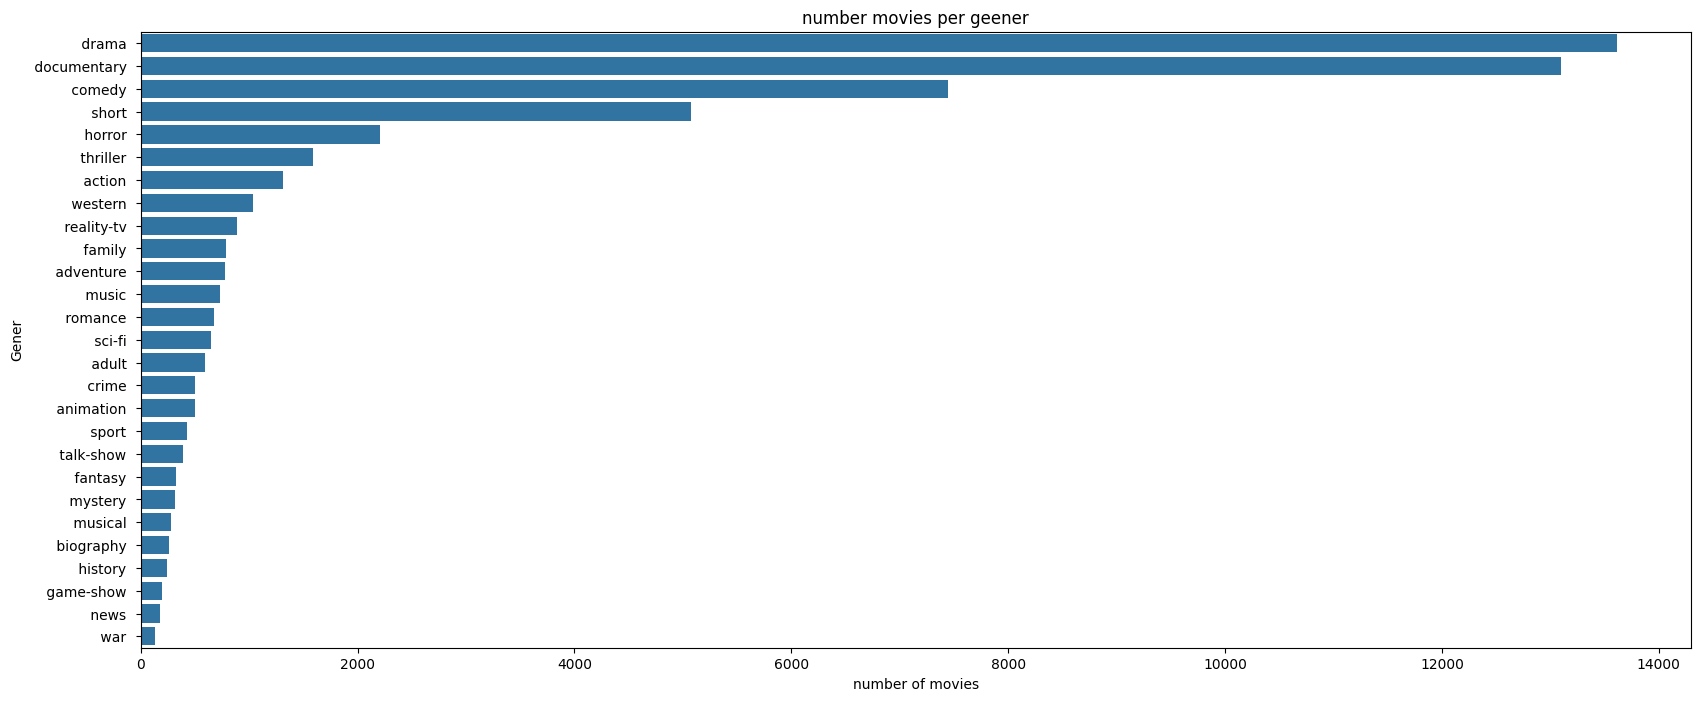

In [26]:
plt.figure(figsize=(20,8))
sns.countplot(y=train_data['Gener'], order=train_data['Gener'].value_counts().index)
plt.title("number movies per geener")
plt.xlabel('number of movies')
plt.ylabel('Gener')
plt.show()

# Bar Representation Of Gener vs Description Lenth

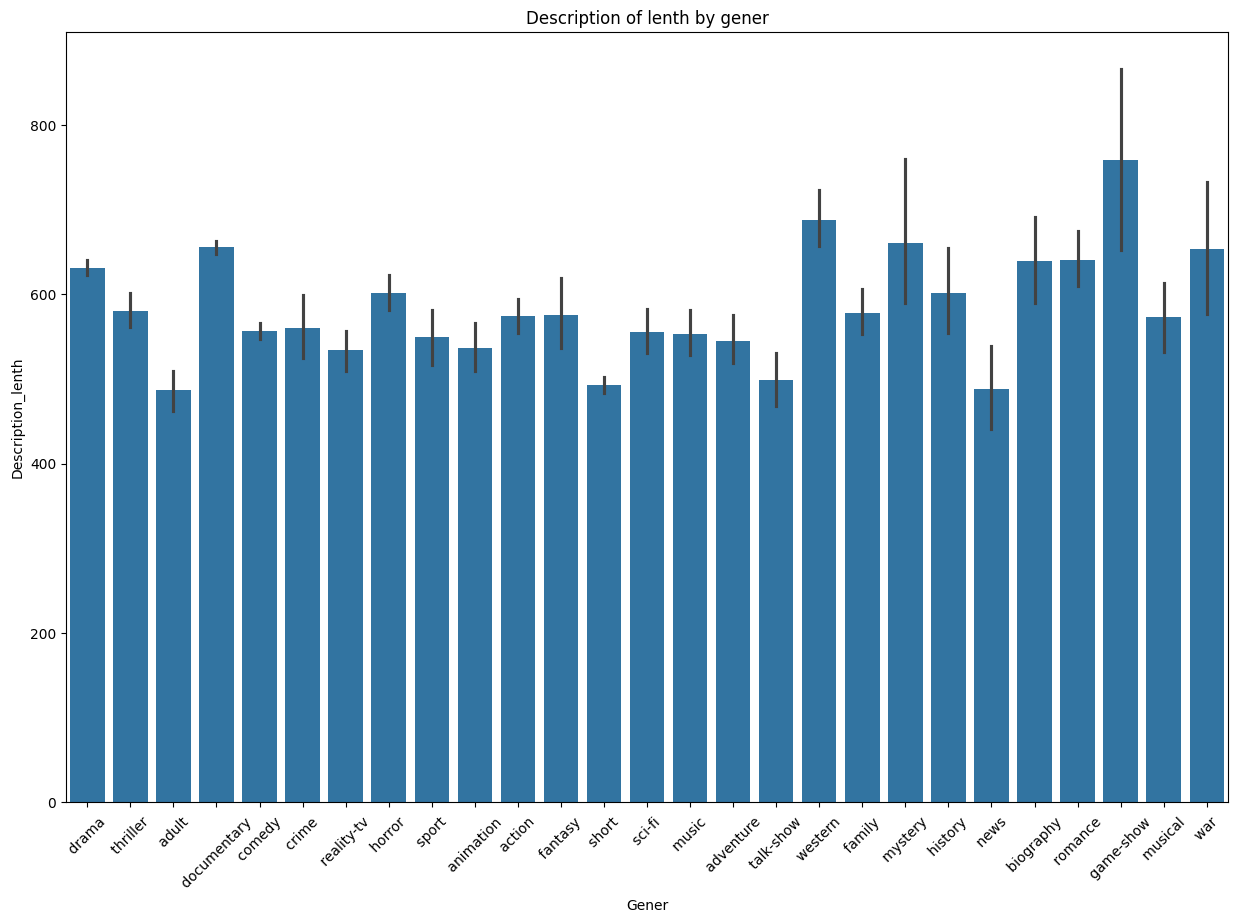

In [27]:
train_data['Description_lenth'] = train_data['Description'].apply(len)

plt.figure(figsize=(15, 10))
sns.barplot(x='Gener', y='Description_lenth', data=train_data)
plt.title('Description of lenth by gener')
plt.xlabel('Gener')
plt.xticks(rotation=45)
plt.ylabel('Description_lenth')
plt.show()

# MOST WATCH GENER

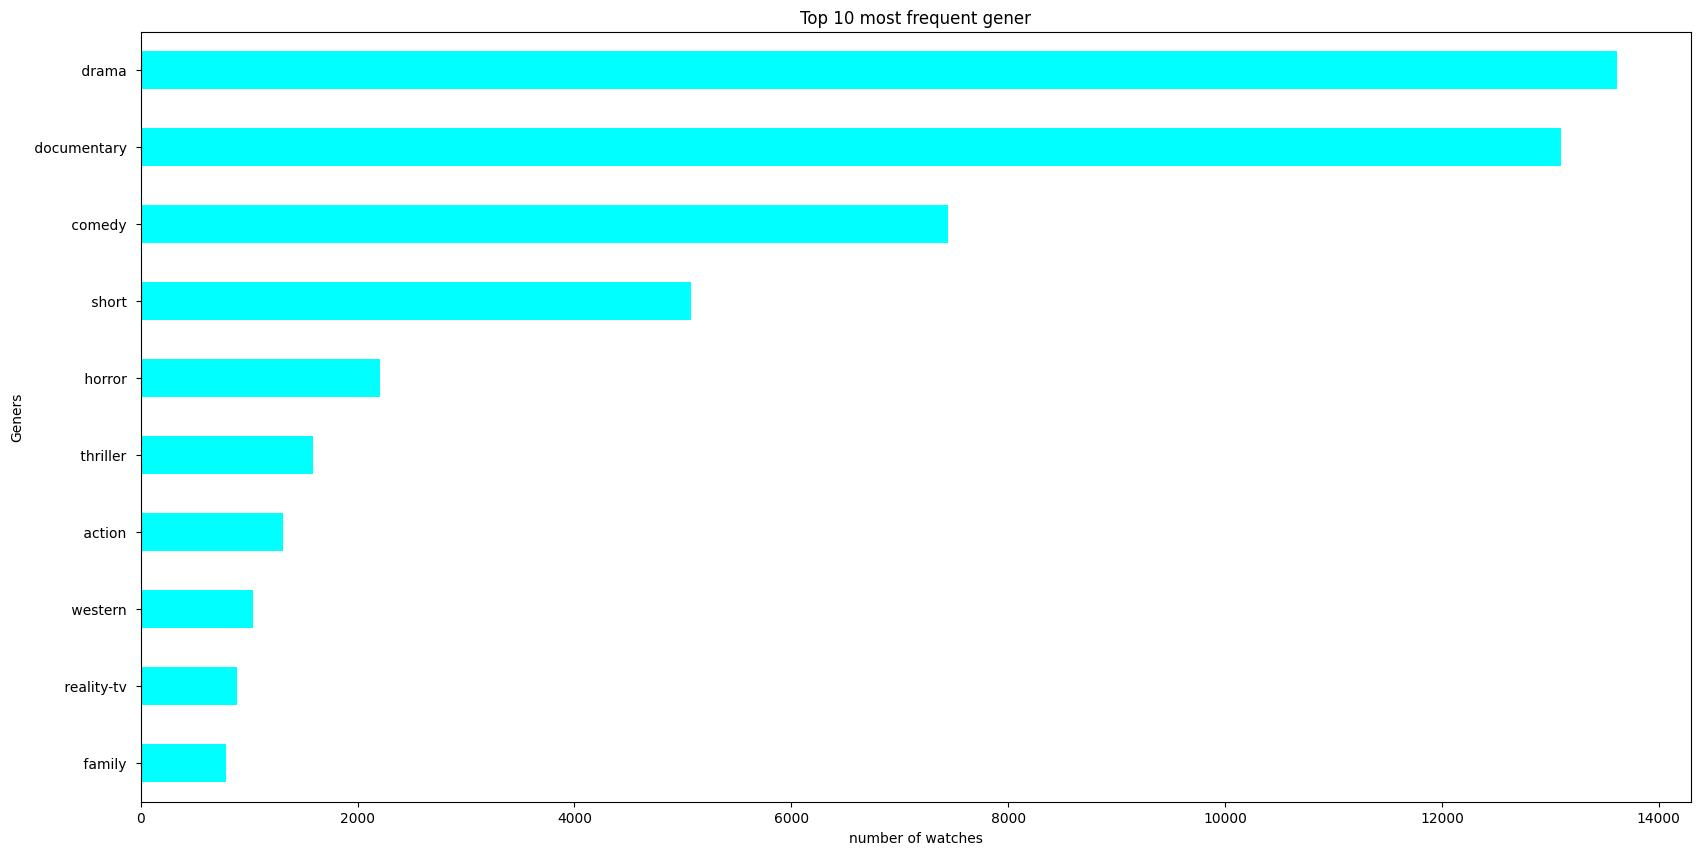

In [28]:
top_gener = train_data['Gener'].value_counts().head(10)
plt.figure(figsize=(20,10))
top_gener.plot(kind='barh', color='cyan')
plt.title('Top 10 most frequent gener')
plt.xlabel('number of watches')
plt.ylabel('Geners')
plt.gca().invert_yaxis()
plt.show()


# NOW TRAINIG AND TESTING DATA

In [29]:
# cleaning data so that our model work very well
train_data['Description'].fillna("", inplace=True)
test_data['Description'].fillna("",inplace=True)
t_v = TfidfVectorizer(stop_words='english', max_features=100000)
x_train = t_v.fit_transform(train_data['Description'])
x_test=t_v.transform(test_data['Description'])
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['Gener'])
y_test = label_encoder.transform(test_data_solution['Gener'])

In [30]:
x_train_sub, x_val, y_train_sub, y_val=train_test_split(x_train, y_train, test_size = 0.2, random_state=42)
clf = LinearSVC()
clf.fit(x_train_sub, y_train_sub)
y_val_pred = clf.predict(x_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.5836945494789265
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0.07        50
      

In [32]:
y_pred=clf.predict(x_test)
#y_pred = y_pred[:9623]
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.09357933579335793
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(x_train,y_train)

MultinomialNB()

In [34]:
Mnb_classifier.predict(x_test)

array([8, 8, 8, ..., 8, 8, 8])

In [35]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [44]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie = "a film that's intended to make the audience laugh by exaggerating characters, actions, language, and situations"
print(predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "A movie where person cashes a girl too get marry with him but girl refuses him."
print(predict_movie(sample_descr_for_movie1))

 comedy 
 drama 
